# Introducción al Análisis del Marketing 

## Importancia
- Conocimiento del cliente
- Optimiza el retorno de la Inversión
- Personaliza la experiencia
- Efectividad de las campañas

## Términos claves
- Funnel de conversión
- Segmentación del mercado
- Customer lifetime Value (CLV)
- Retención y Churn

## Ejemplos 
- Personalizar las campañas
- Optimizar los presupuestos publcitarios
- Efectividad de las campañas


# Métricas clave de marketing
 ## 1.- KPI's de Adquisición (Enfocado a atraer nuevos clientes)
   - ### CAC (Costo de adquision del cliente)
  $$
  \text{CAC} = \frac{\text{Total \, invertido \, en \, marketing \, y \, ventas}}{\text{Número \, de \, nuevos \, clientes \, adquiridos}}
  $$
  - ### CTR (Clicks por impresiones, relevancia y atractivo de los anuncios)
  $$
  \text{CTR} (\%)= \frac{\text{Clicks \, en \, el \, anuncio}}{\text{Impresiones \, totales}} \times 100
  $$
  - ### CPC (Costo por Click)
  $$
  \text{CPC} = \frac{\text{Costo \, total \, de \, la \, campaña}}{\text{Número \, de \, clicks}} \times 100
  $$

  ## 2.- KPI's de Conversión (Miden el rendimiento de las ventas y acciones clave)

  - ### Tasa de conversión 
  $$
  \text{Tasa \, de \, conversión} (\%) = \frac{\text{Número \, de \, conversiones }}{\text{Número \, de \,visitantes \,únicos}} \times 100
  $$

  - ### ROAS 
    (Return on Advertising Spend, por sus siglas en inglés) es una métrica clave en marketing digital que mide la eficiencia de una campaña publicitaria en términos de ingresos generados en comparación con el gasto publicitario.
  $$
  \text{ROAS} = \frac{\text{Ingresos Generados por la Campaña}}{\text{Gasto en Publicidad}}
  $$

  ## 3.- KPI's Retención ( Comportamiento de los clientes ya existentes)ç

  - ### Tasa de Churn (Abandono)
  $$
  \text{Churn Rate} (\%)= \frac{\text{Clientes perdidos en un período}}{\text{Clientes totales al inicio del período}} \times 100
  $$

  - ### Tasa de Retención (Mantener al cliente)
  $$
  \text{Tasa de retención} (\%) = {\text{100}}-{\text{Tasa de Churn (\%)}} \times 100
  $$

  - ### CLV (Customer Lifetime Value)
  $$
  \text{CLV} = \text{Ingreso Promedio por Cliente} \times \text{Frecuencia de Compra} \times \text{Duración de la Relación (en años)}
  $$


# Métricas as generar
- CTR
- CPC
- CPM ( Costo por mil)
- CPE (Costo por engagement)
- Costo por conversión
- Converision_Value
- Engagement_Rate
- impresión por Dolar
- Éxito de la campaña
- CLV (Impresiones, no clientes)

In [2]:
import pandas as pd
import numpy as np   
# Estaqblecer la visualizacion de todas las columnas
pd.set_option('display.max_columns', None)
# Establecer el formato para números de punto flotante
pd.options.display.float_format = lambda x: '%.4f' % x
# Paquetes d visualización
import seaborn as sns
import matplotlib.pyplot as plt 

import sys
sys.path.append('..')
from src import soporte_analisis as spa
from src import sp_visualizacin as spv
from src import sp_eda as spe
from src import sp_nulos as spn
from src import sp_outliers_count as spo


In [3]:
df= pd.read_csv('../data/5.nulos_numericas_limpios.csv', parse_dates=['date'])

In [4]:
df.head()

,campaign_id,company,campaign_type,channel_used,conversion_rate,location,language,customer_segment,date,total($),genre,ages,year,month,day_name,quarter,duration_knn,roi_knn,clicks_knn,impressions_knn,engagement_score_knn
0,1,innovate industries,unknow,google ads,0.0404,chicago,spanish,health & wellness,2021-01-01,16174.0000,men,18-24,2021.0000,1.0000,friday,1.0000,30.0000,6.2900,267276.2000,19221922.0000,66.0000
1,2,nexgen systems,email,google ads,0.1212,new york,german,fashionistas,2021-01-02,11566.0000,women,35-44,2021.0000,1.0000,saturday,1.0000,60.0000,5.6100,116.0000,7523.0000,7.0000
2,3,alpha innovations,influencer,youtube,0.0707,los angeles,french,outdoor adventurers,2021-01-03,10200.0000,men,25-34,2021.0000,1.0000,sunday,1.0000,30.0000,7.1800,193442.4000,7698.0000,11.0000
3,4,unknow,display,youtube,0.1111,miami,mandarin,health & wellness,2021-01-04,12724.0000,unknow,all_ages,2021.0000,1.0000,monday,1.0000,60.0000,27.0926,217.0000,57782200.6000,7.0000
4,5,nexgen systems,email,youtube,0.0505,los angeles,unknow,health & wellness,2021-01-05,16452.0000,men,25-34,2021.0000,1.0000,tuesday,1.0000,15.0000,66.5500,379379.0000,4201.0000,33.0000


In [5]:
df['CTR'] = df['clicks_knn'] / df['impressions_knn'] 
df['CPC'] = df['total($)'] / df['clicks_knn']
df['CPM'] = df['total($)'] / df['impressions_knn'] * 1000
df['CPE'] = df['total($)'] / df['engagement_score_knn']
df['conversion_cost']= df['total($)'] / df['conversion_rate']
df['conversion_value'] = df['conversion_rate'] * df['roi_knn']
df['engagement_rate'] = df['engagement_score_knn'] / df ['impressions_knn']
df['impressions_per_$'] = df['impressions_knn'] / df['total($)']
df['is_succesfull'] = df['roi_knn'].apply(lambda x: 1 if x > 5 else 0)
df['CLV'] = df['roi_knn'] * df['conversion_rate'] * df['impressions_knn']

In [6]:
df.columns

Index(['campaign_id', 'company', 'campaign_type', 'channel_used',
       'conversion_rate', 'location', 'language', 'customer_segment', 'date',
       'total($)', 'genre', 'ages', 'year', 'month', 'day_name', 'quarter',
       'duration_knn', 'roi_knn', 'clicks_knn', 'impressions_knn',
       'engagement_score_knn', 'CTR', 'CPC', 'CPM', 'CPE', 'conversion_cost',
       'conversion_value', 'engagement_rate', 'impressions_per_$',
       'is_succesfull', 'CLV'],
      dtype='object')

In [7]:
df_metricas= df[['CTR', 'CPC', 'CPM', 'CPE', 'conversion_cost',
       'conversion_value', 'engagement_rate', 'impressions_per_$',
       'is_succesfull', 'CLV']]

In [8]:
df_metricas.describe().T

,count,mean,std,min,25%,50%,75%,max
CTR,209915.0000,31.6704,82.0610,0.0000,0.0019,0.0203,14.8096,991.0398
CPC,209915.0000,13.7620,23.6579,0.0050,0.0243,0.0744,20.0158,199.6100
CPM,209915.0000,1441.8150,2406.2681,0.0501,0.2295,0.7390,2090.8449,19896.1039
CPE,209915.0000,1826.6933,2984.1863,4.9525,198.4014,714.2353,2073.1806,20000.0000
conversion_cost,209915.0000,242384.5703,262389.6238,33062.7063,102503.5361,154720.2274,266351.9566,2000000.0000
conversion_value,209915.0000,2.2329,2.4520,0.0200,0.4038,1.1044,3.3587,13.3320
engagement_rate,209915.0000,0.0091,0.0465,0.0000,0.0000,0.0000,0.0027,1.0080
impressions_per_$,209915.0000,2597.6372,3334.6177,0.0503,0.4783,1353.0904,4358.0375,19946.0950
is_succesfull,209915.0000,0.7917,0.4061,0.0000,1.0000,1.0000,1.0000,1.0000
CLV,209915.0000,62701161.0050,125481445.7112,25.3422,6844.3301,6352670.0802,60310253.4223,1164259229.5695


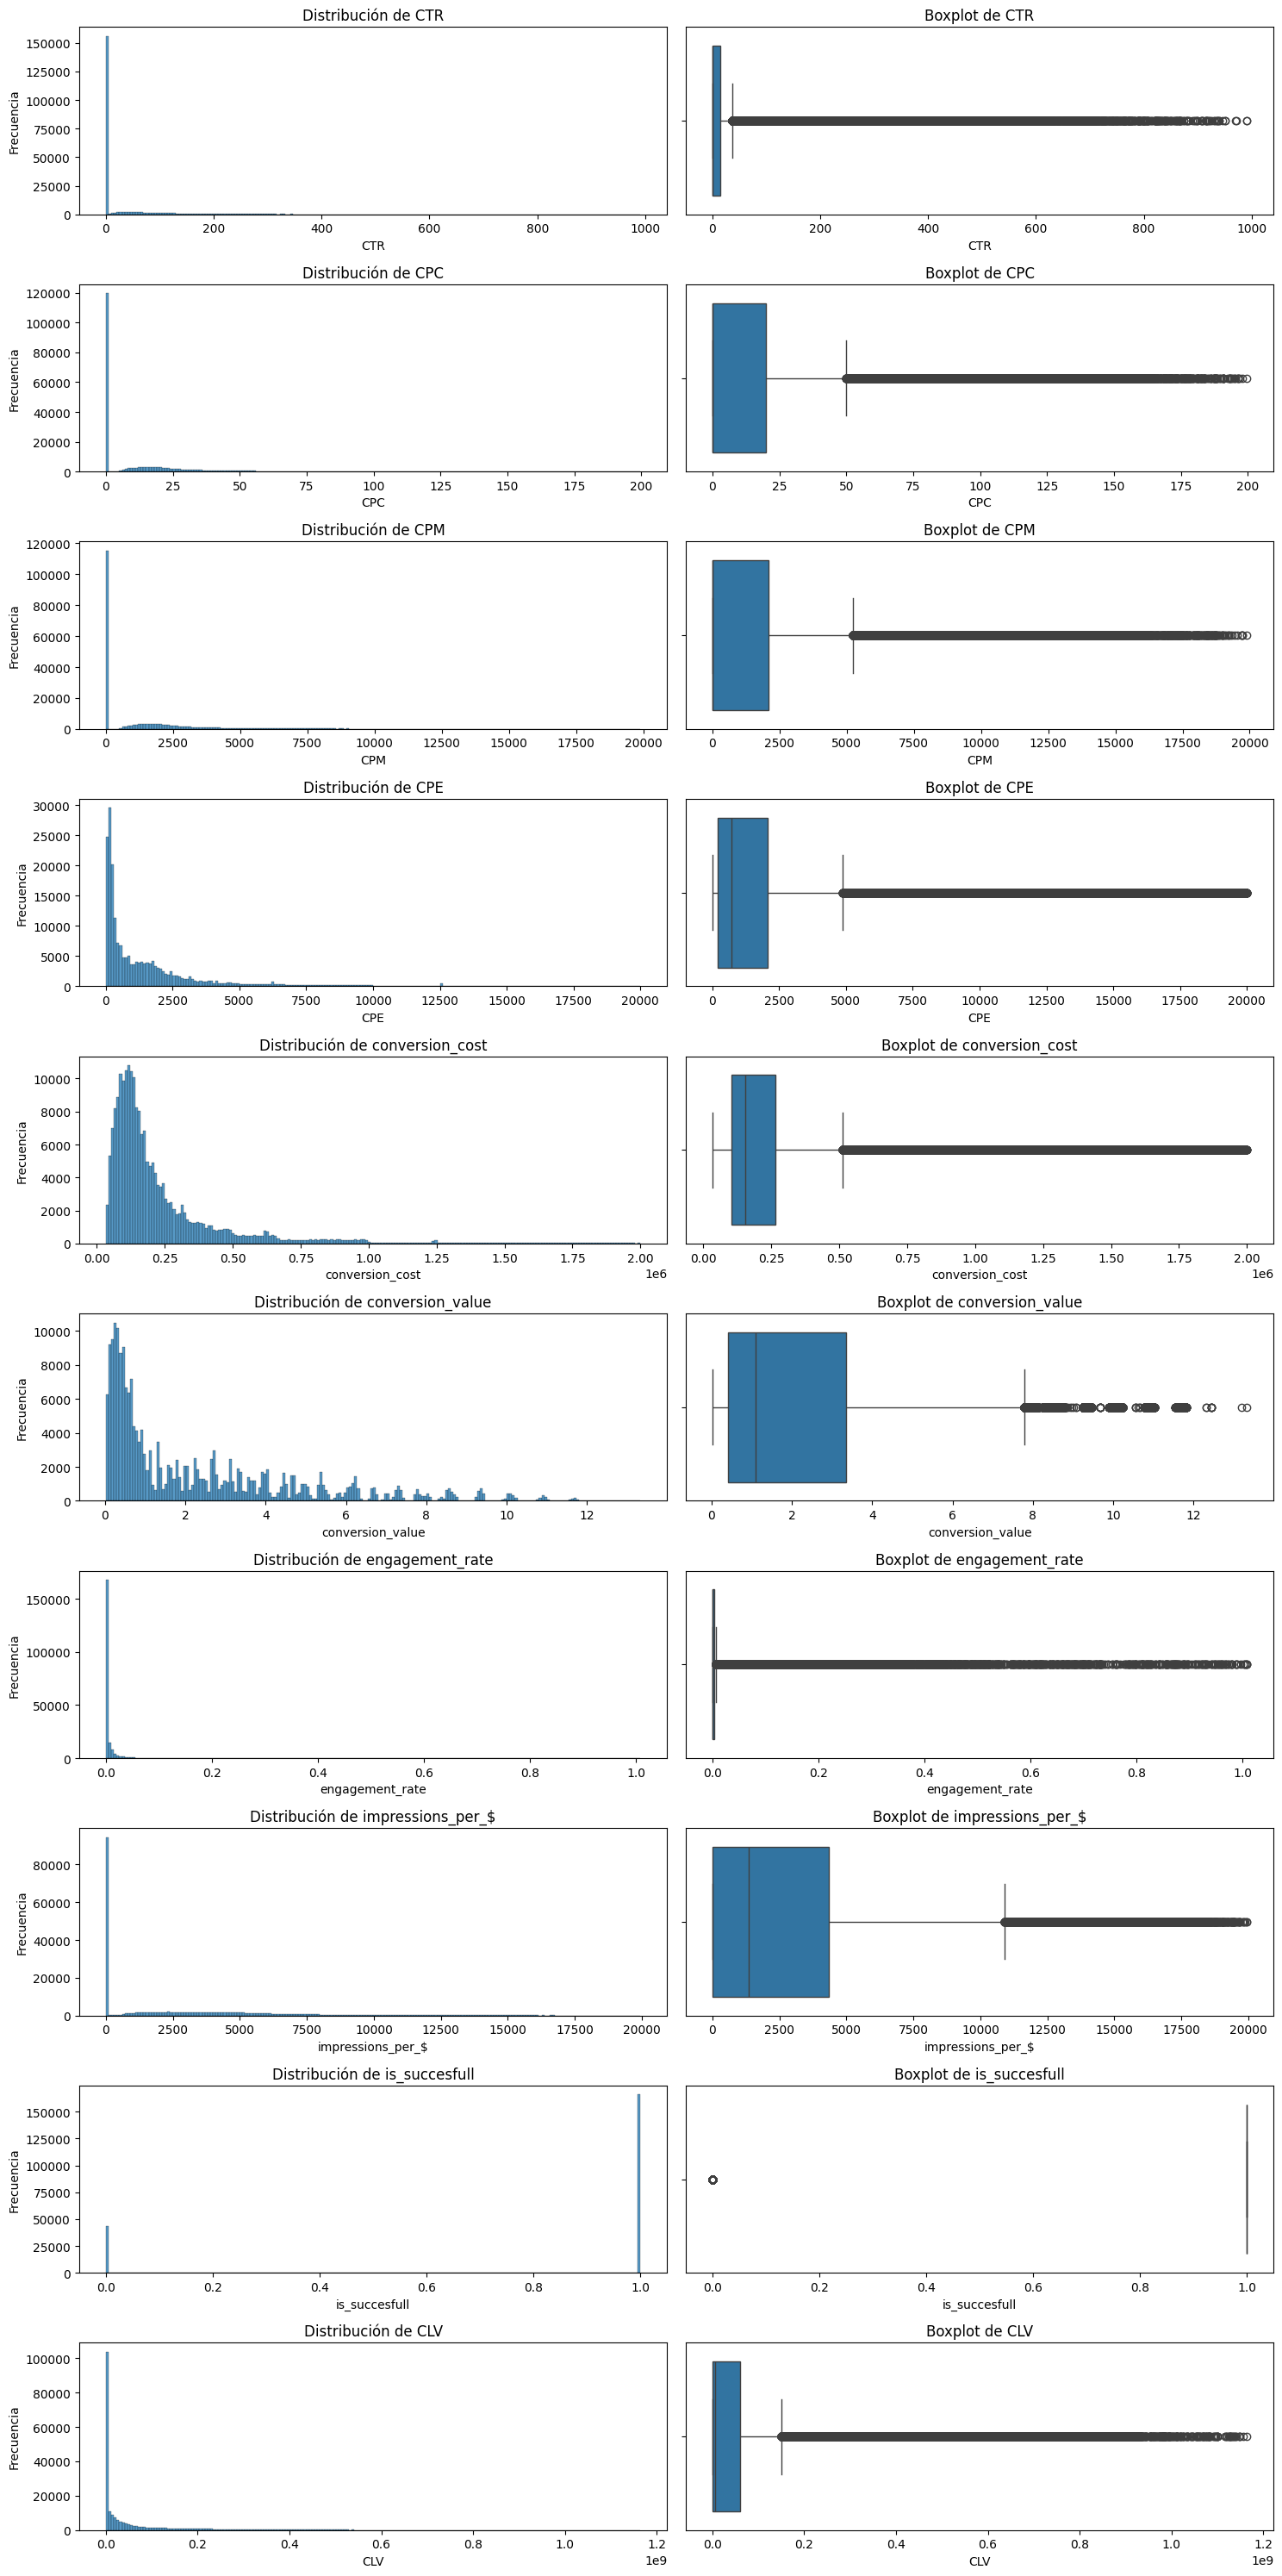

In [9]:
spv.subplot_col_num(df_metricas, df_metricas.columns)

Número de outliers en las métricas

In [10]:
df.columns

Index(['campaign_id', 'company', 'campaign_type', 'channel_used',
       'conversion_rate', 'location', 'language', 'customer_segment', 'date',
       'total($)', 'genre', 'ages', 'year', 'month', 'day_name', 'quarter',
       'duration_knn', 'roi_knn', 'clicks_knn', 'impressions_knn',
       'engagement_score_knn', 'CTR', 'CPC', 'CPM', 'CPE', 'conversion_cost',
       'conversion_value', 'engagement_rate', 'impressions_per_$',
       'is_succesfull', 'CLV'],
      dtype='object')

In [11]:
columnas_analizar= ['engagement_score_knn', 'CTR', 'CPC', 'CPM', 'CPE', 'conversion_cost',
       'conversion_value', 'engagement_rate', 'impressions_per_$',
       'is_succesfull', 'CLV']

spo.count_outliers(df, columnas_analizar)

({'engagement_score_knn': 15345,
  'CTR': 44200,
  'CPC': 15029,
  'CPM': 14636,
  'CPE': 19352,
  'conversion_cost': 20469,
  'conversion_value': 9722,
  'engagement_rate': 35791,
  'impressions_per_$': 6514,
  'is_succesfull': 43722,
  'CLV': 29412},
 {'engagement_score_knn': 0.073,
  'CTR': 0.211,
  'CPC': 0.072,
  'CPM': 0.07,
  'CPE': 0.092,
  'conversion_cost': 0.098,
  'conversion_value': 0.046,
  'engagement_rate': 0.171,
  'impressions_per_$': 0.031,
  'is_succesfull': 0.208,
  'CLV': 0.14})

CTR promedio por tipo de campaña:


campaign_type
social media   32.3738
influencer     31.8134
display        31.6110
search         31.4339
unknow         31.3203
email          31.2879
Name: CTR, dtype: float64

CTR promedio por canal utilizado:


channel_used
youtube      32.5933
google ads   32.4000
email        32.0538
instagram    31.6354
unknow       31.5883
website      30.6964
facebook     30.6800
Name: CTR, dtype: float64

c:\Users\maria\Documents\GitHub\ProyectoEDAmarketing\jupyter\..\src\sp_outliers_count.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(ctr_by_campaign.index, rotation = 45)
c:\Users\maria\Documents\GitHub\ProyectoEDAmarketing\jupyter\..\src\sp_outliers_count.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(ctr_by_channel.index, rotation = 45)


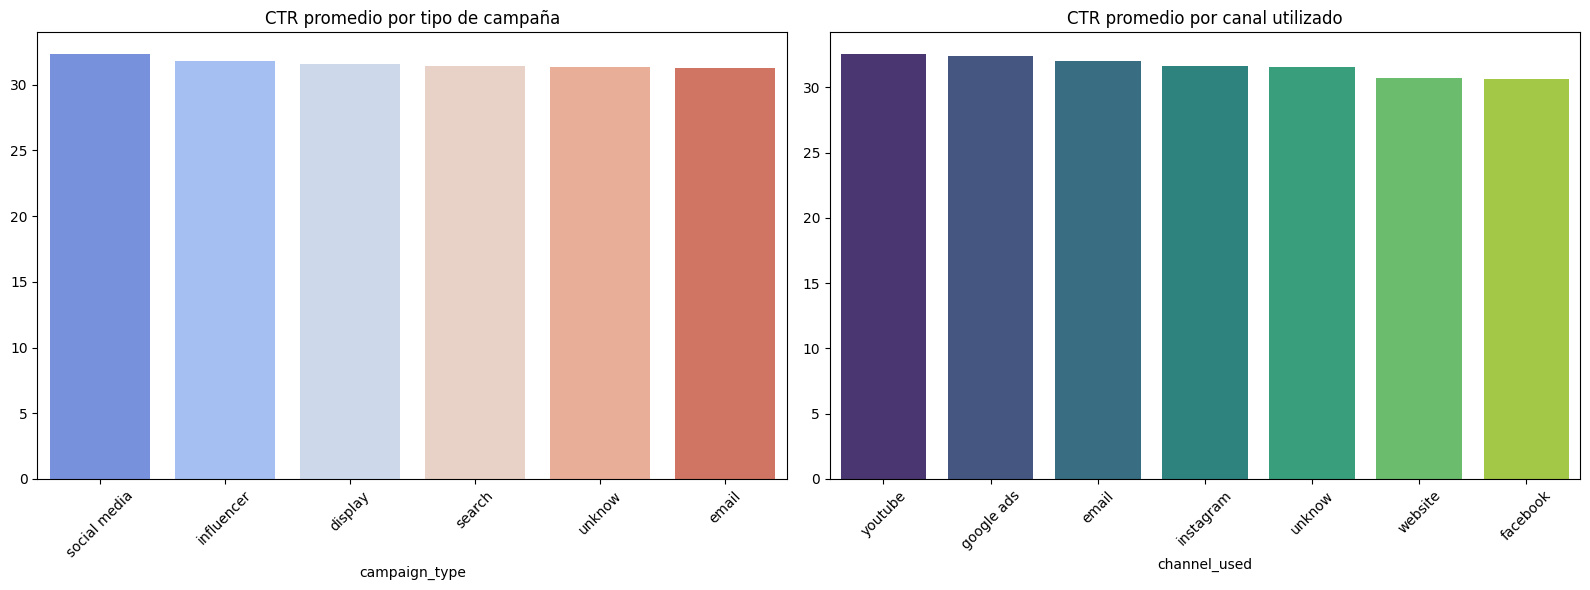

In [12]:
spo.analyze_ctr_witnout_outliers(df)

In [13]:
spo.filter_no_outliers(df, columnas_analizar)

,campaign_id,company,campaign_type,channel_used,conversion_rate,location,language,customer_segment,date,total($),genre,ages,year,month,day_name,quarter,duration_knn,roi_knn,clicks_knn,impressions_knn,engagement_score_knn,CTR,CPC,CPM,CPE,conversion_cost,conversion_value,engagement_rate,impressions_per_$,is_succesfull,CLV
0,1,innovate industries,unknow,google ads,0.0404,chicago,spanish,health & wellness,2021-01-01,16174.0000,men,18-24,2021.0000,1.0000,friday,1.0000,30.0000,6.2900,267276.2000,19221922.0000,66.0000,0.0139,0.0605,0.8414,245.0606,400346.5347,0.2541,0.0000,1188.4458,1,4884597.9310
1,2,nexgen systems,email,google ads,0.1212,new york,german,fashionistas,2021-01-02,11566.0000,women,35-44,2021.0000,1.0000,saturday,1.0000,60.0000,5.6100,116.0000,7523.0000,7.0000,0.0154,99.7069,1537.4186,1652.2857,95429.0429,0.6799,0.0009,0.6504,1,5115.1284
2,3,alpha innovations,influencer,youtube,0.0707,los angeles,french,outdoor adventurers,2021-01-03,10200.0000,men,25-34,2021.0000,1.0000,sunday,1.0000,30.0000,7.1800,193442.4000,7698.0000,11.0000,25.1289,0.0527,1325.0195,927.2727,144271.5700,0.5076,0.0014,0.7547,1,3907.7049
3,4,unknow,display,youtube,0.1111,miami,mandarin,health & wellness,2021-01-04,12724.0000,unknow,all_ages,2021.0000,1.0000,monday,1.0000,60.0000,27.0926,217.0000,57782200.6000,7.0000,0.0000,58.6359,0.2202,1817.7143,114527.4527,3.0100,0.0000,4541.1978,1,173923979.1142
4,5,nexgen systems,email,youtube,0.0505,los angeles,unknow,health & wellness,2021-01-05,16452.0000,men,25-34,2021.0000,1.0000,tuesday,1.0000,15.0000,66.5500,379379.0000,4201.0000,33.0000,90.3068,0.0434,3916.2104,498.5455,325782.1782,3.3608,0.0079,0.2553,1,14118.6158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209910,105984,alpha innovations,email,youtube,0.0202,chicago,spanish,outdoor adventurers,2021-05-14,9180.0000,men,18-24,2021.0000,5.0000,friday,2.0000,30.0000,44.4747,480.8000,79087908.0000,77.0000,0.0000,19.0932,0.1161,119.2208,454455.4455,0.8984,0.0000,8615.2405,1,71051701.8349
209911,186903,datatech solutions,social media,website,0.0700,los angeles,unknow,foodies,2021-01-23,6382.0000,women,25-34,2021.0000,1.0000,saturday,1.0000,60.0000,5.0500,834834.0000,1774.0000,99.0000,470.5941,0.0076,3597.5197,64.4646,91171.4286,0.3535,0.0558,0.2780,1,627.1090
209912,28288,techcorp,display,unknow,0.0303,miami,mandarin,fashionistas,2021-07-02,18155.0000,men,18-24,2021.0000,7.0000,friday,3.0000,60.0000,6.3400,314314.0000,61466146.0000,44.0000,0.0051,0.0578,0.2954,412.6136,599174.9175,0.1921,0.0000,3385.6318,1,11807769.5789
209913,39333,innovate industries,display,google ads,0.0505,chicago,german,health & wellness,2021-10-05,15166.0000,women,25-34,2021.0000,10.0000,tuesday,4.0000,15.0000,33.4747,457457.0000,23602728.8000,11.0000,0.0194,0.0332,0.6426,1378.7273,300316.8317,1.6905,0.0000,1556.2923,1,39899760.4209


In [14]:
df_completo= df.copy()
df_no_outliers=spo.filter_no_outliers(df_completo, columnas_analizar)
df_only_outliers= df_completo[~df_completo.index.isin(df_no_outliers.index)]

CTR promedio por tipo de campaña:


campaign_type
display        0.0234
influencer     0.0230
search         0.0202
email          0.0185
unknow         0.0181
social media   0.0167
Name: CTR, dtype: float64

CTR promedio por canal utilizado:


channel_used
email        0.0226
website      0.0216
youtube      0.0202
google ads   0.0197
unknow       0.0193
instagram    0.0192
facebook     0.0182
Name: CTR, dtype: float64

c:\Users\maria\Documents\GitHub\ProyectoEDAmarketing\jupyter\..\src\sp_outliers_count.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(ctr_by_campaign.index, rotation = 45)
c:\Users\maria\Documents\GitHub\ProyectoEDAmarketing\jupyter\..\src\sp_outliers_count.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(ctr_by_channel.index, rotation = 45)


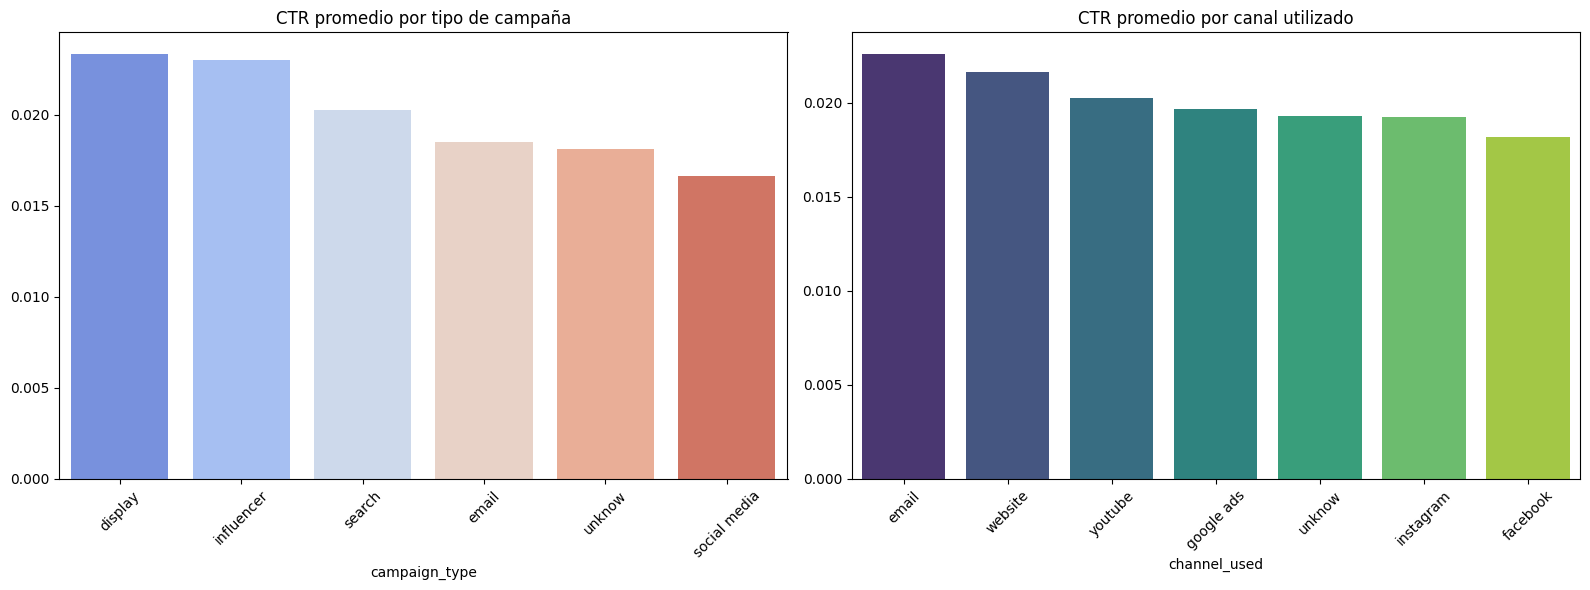

In [15]:
spo.analyze_ctr_witnout_outliers(df_only_outliers, outliers= True)

Conversion_cost promedio por canal utilizado:
channel_used
instagram    244463.3928
google ads   244047.8455
youtube      243281.8903
website      242020.0979
email        241255.9217
facebook     240925.6724
unknow       239736.5829
Name: conversion_cost, dtype: float64 

Conversion_cost promedio por segmento de cliente:
customer_segment
unknow                244931.6187
health & wellness     243406.8517
tech enthusiasts      243383.7329
foodies               242892.3951
outdoor adventurers   240786.0893
fashionistas          240426.8200
Name: conversion_cost, dtype: float64 

Conversion_value promedio por canal utilizado:
channel_used
facebook     2.2564
unknow       2.2473
email        2.2400
website      2.2388
google ads   2.2310
youtube      2.2280
instagram    2.2027
Name: conversion_value, dtype: float64 

Conversion_value promedio por segmento de cliente:
customer_segment
foodies               2.2470
tech enthusiasts      2.2462
outdoor adventurers   2.2341
health & wellness  

c:\Users\maria\Documents\GitHub\ProyectoEDAmarketing\jupyter\..\src\sp_outliers_count.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_by_segment.index, y=metric_by_segment.values, palette='muted', ax=axes[0])
c:\Users\maria\Documents\GitHub\ProyectoEDAmarketing\jupyter\..\src\sp_outliers_count.py:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(metric_by_segment.index, rotation = 45)
c:\Users\maria\Documents\GitHub\ProyectoEDAmarketing\jupyter\..\src\sp_outliers_count.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_by_channel.index, y= metric_by_channel.v

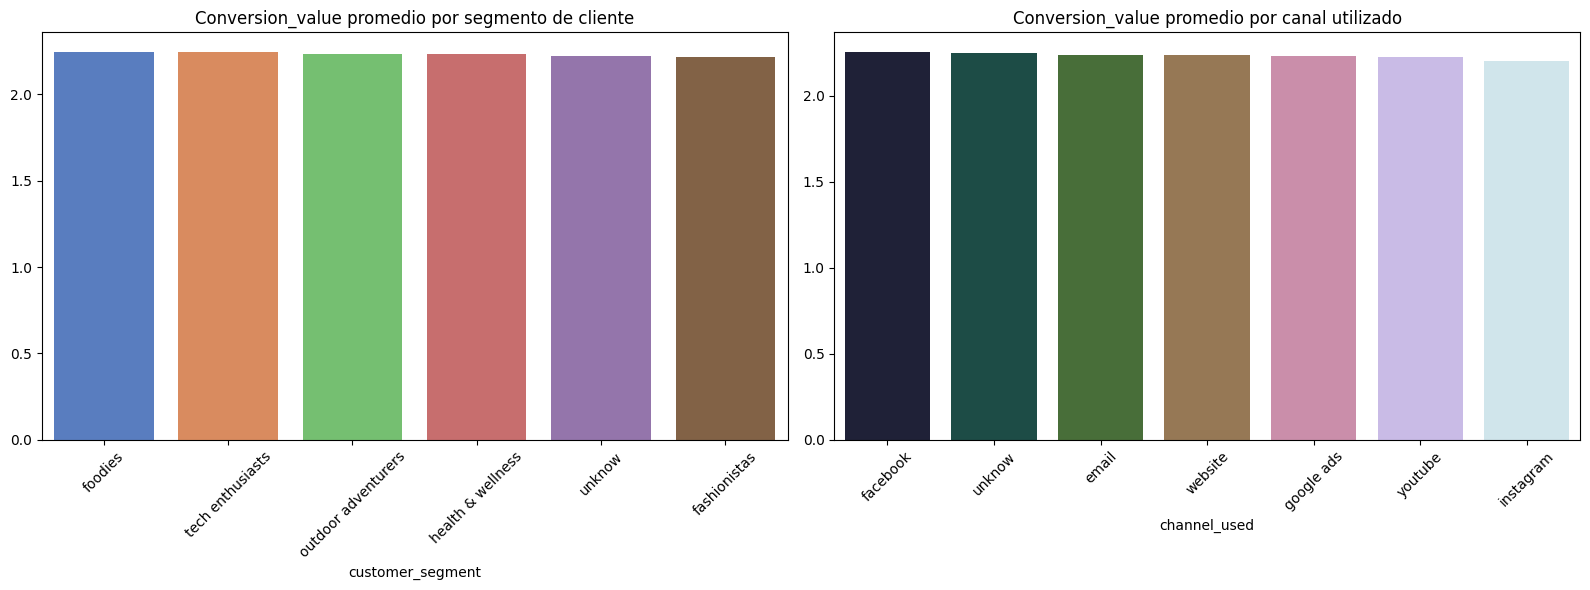

In [16]:
spo.analyze_conversion_metrics(df_no_outliers, False)

In [17]:
spo.analyze_conversion_metrics(df_only_outliers, True)

UnboundLocalError: cannot access local variable 'metric' where it is not associated with a value